In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

import joblib 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Display settings
sns.set_theme(style='whitegrid', palette='muted', font_scale=1.05)
pd.set_option('display.max_columns', 200)

In [3]:
df = pd.read_csv('customer_data.csv')

In [4]:
df.shape

(10000, 12)

In [5]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [7]:
df.describe(include='all')

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569094e+07,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [8]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [13]:
print("\nChurn Value Counts:")
df['churn'].value_counts(normalize=False)



Churn Value Counts:


churn
0    7963
1    2037
Name: count, dtype: int64

In [14]:
print("\nChurn proportions:")
df['churn'].value_counts(normalize=True)


Churn proportions:


churn
0    0.7963
1    0.2037
Name: proportion, dtype: float64

In [17]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

EDA

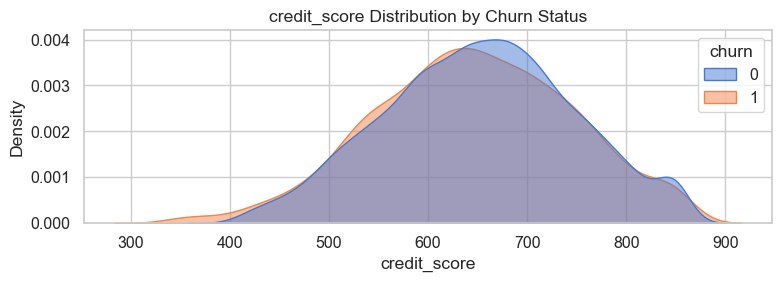

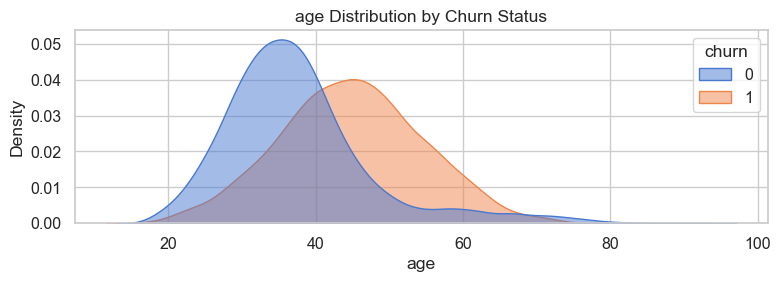

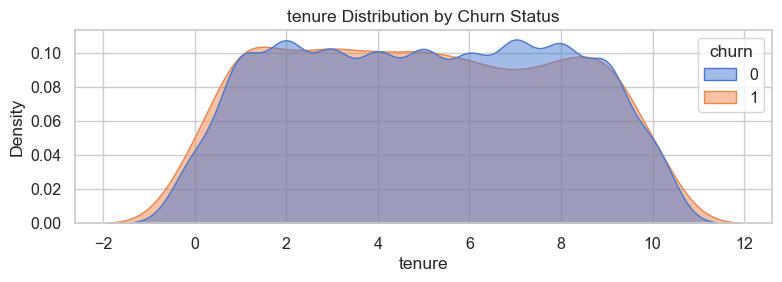

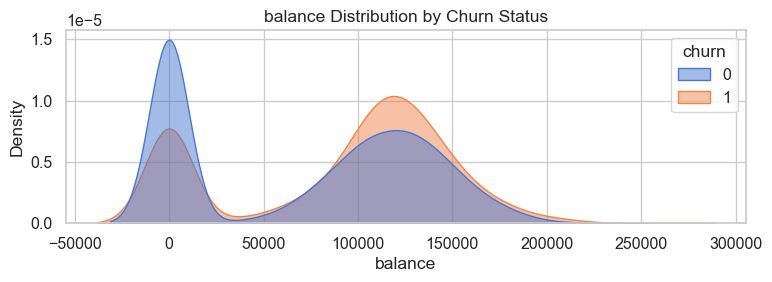

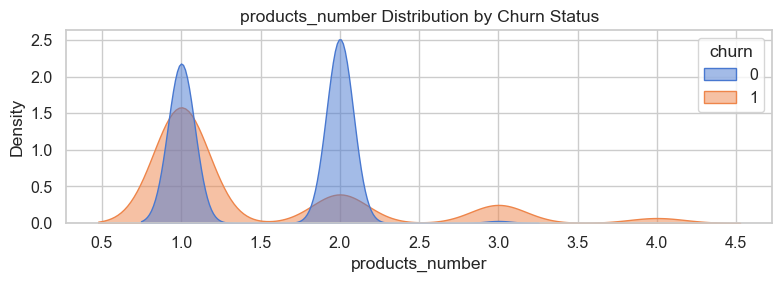

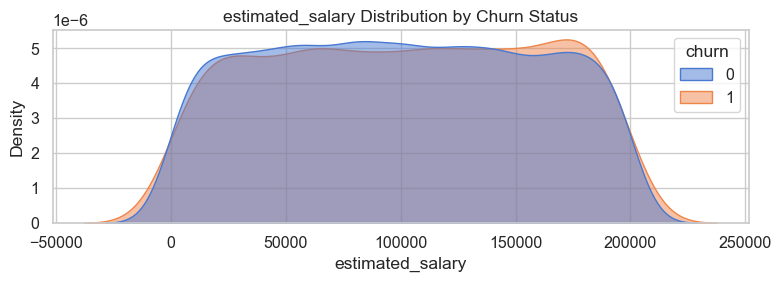

In [19]:
num_cols = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']

#distribution plots
for col in num_cols:
    plt.figure(figsize=(8,3))
    sns.kdeplot(data=df, x=col, hue='churn', fill=True, common_norm=False, alpha=0.5)
    plt.title(f'{col} Distribution by Churn Status')
    plt.tight_layout()
    plt.show()


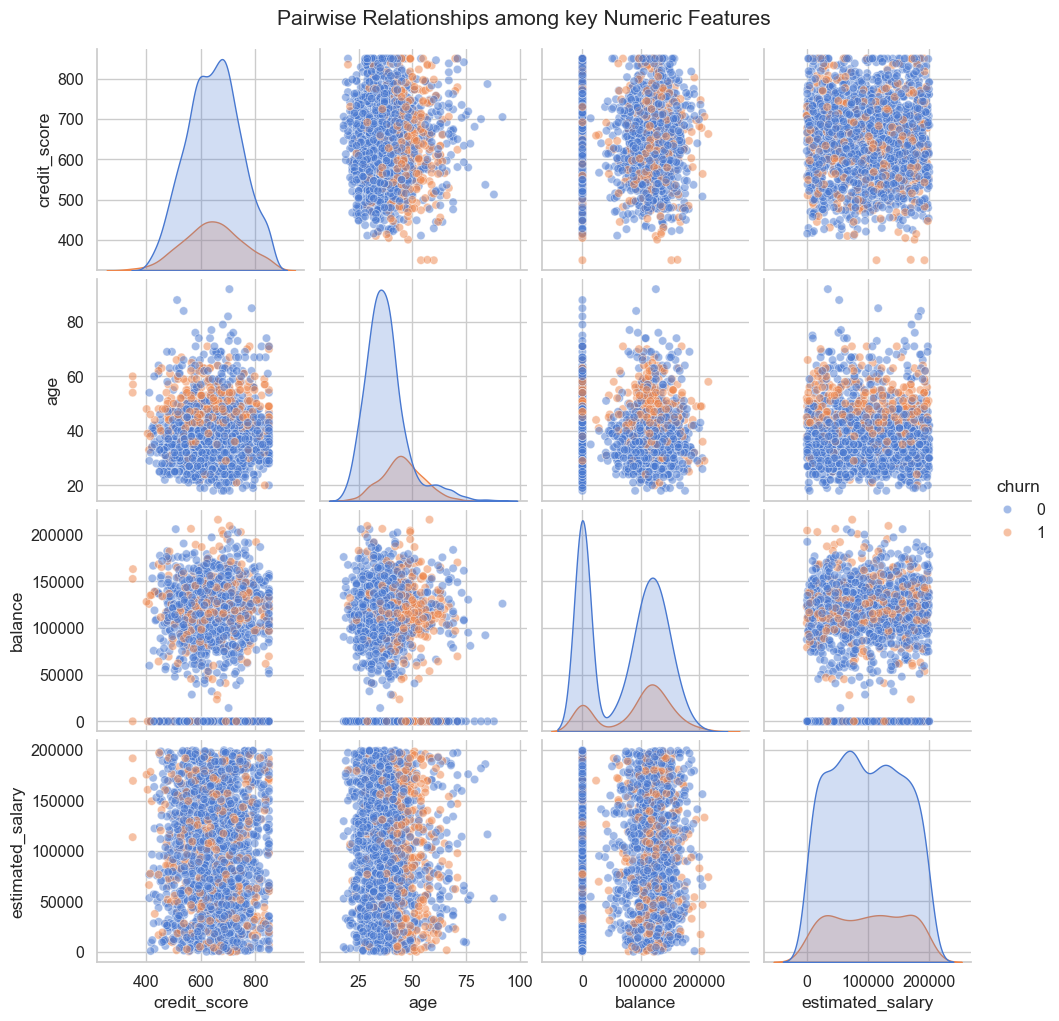

In [20]:
#pairplot  
sns.pairplot(df.sample(frac=0.2, random_state=42),
             vars=['credit_score', 'age', 'balance', 'estimated_salary'], 
            hue='churn', diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pairwise Relationships among key Numeric Features', y=1.02)
plt.show()

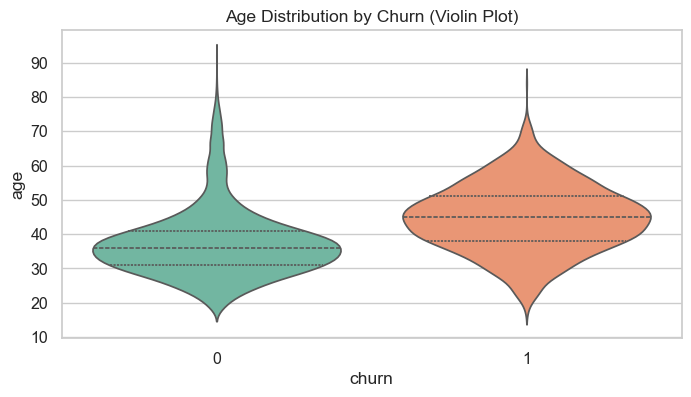

In [21]:
#Violin plot for Age
plt.figure(figsize=(8,4))
sns.violinplot(data=df, x='churn', y='age', inner='quart', palette='Set2')
plt.title('Age Distribution by Churn (Violin Plot)')
plt.show()

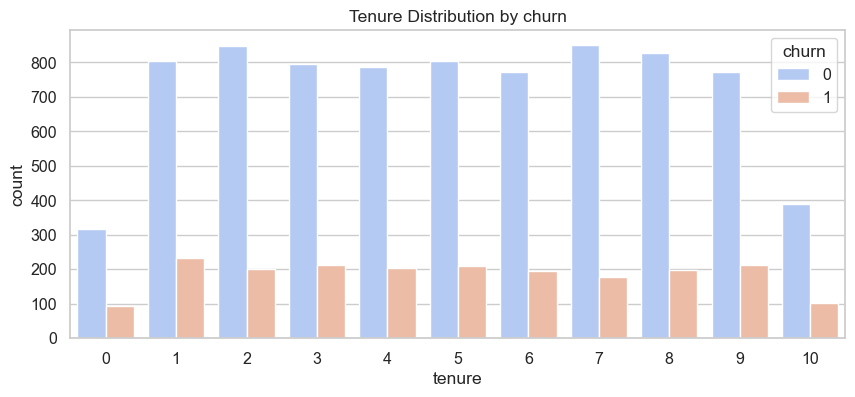

In [23]:
#Tenure distribution
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='tenure', hue='churn', palette='coolwarm')
plt.title('Tenure Distribution by churn')
plt.show()

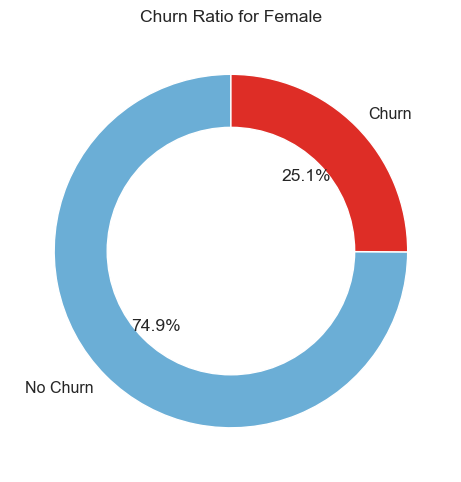

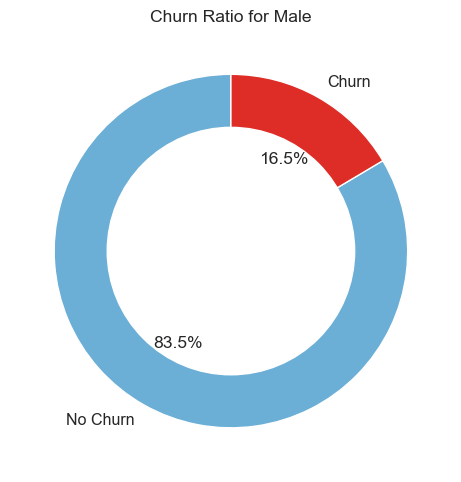

In [24]:
#gender vs churn donut chart
gender_counts = df.groupby('gender')['churn'].value_counts(normalize=True).unstack().fillna(0)
for gender in gender_counts.index:
    plt.figure(figsize=(5,5))
    plt.pie(gender_counts.loc[gender], labels=['No Churn', 'Churn'],
            autopct='%1.1f%%', startangle=90, colors=['#6baed6', '#de2d26'])
    center = plt.Circle((0,0),0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center)
    plt.title(f'Churn Ratio for {gender}')
    plt.tight_layout()
    plt.show()

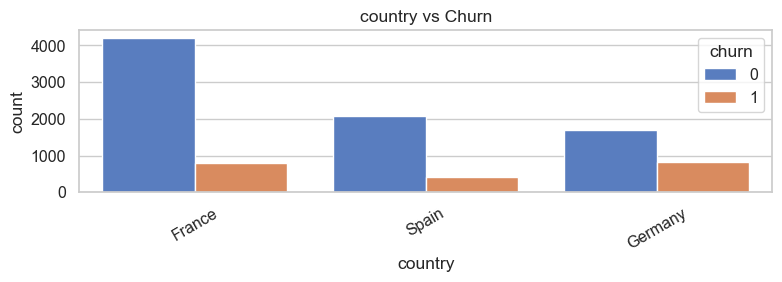

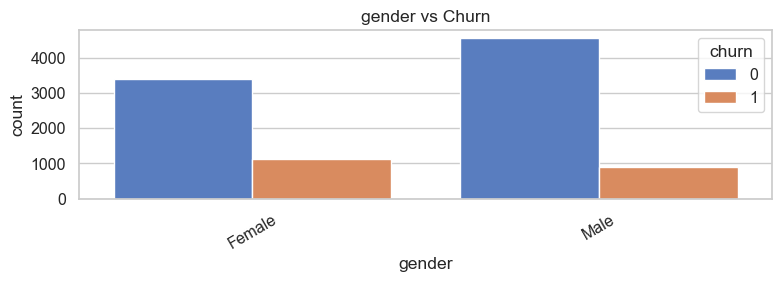

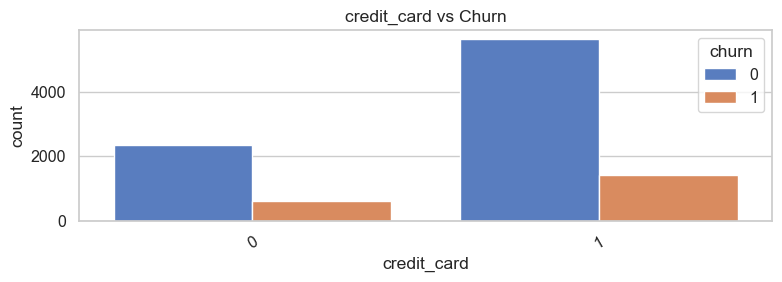

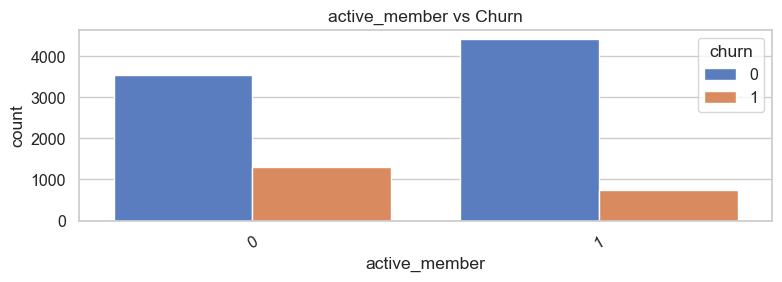

In [25]:
#Categorical Features
cat_cols = ['country', 'gender', 'credit_card', 'active_member']
for c in cat_cols:
    plt.figure(figsize=(8,3))
    sns.countplot(data=df, x=c, hue='churn')
    plt.title(f'{c} vs Churn')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

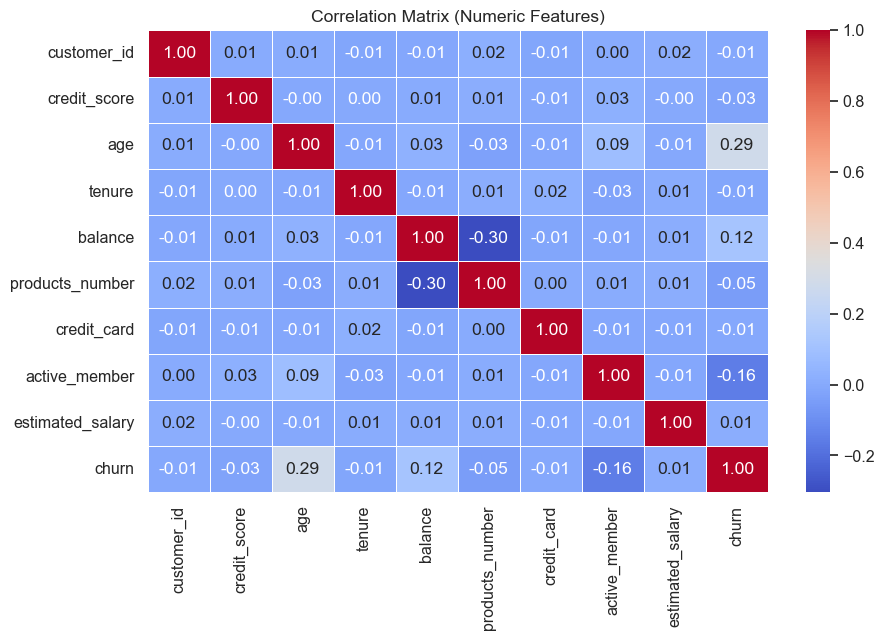

In [29]:
#Heatmap visualization
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix (Numeric Features)')
plt.show()

In [ ]:
#numeric correlation heatmap
numeric_data = df[num_cols] 
corr = numeric_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,credit_score,age,tenure,balance,products_number,estimated_salary
credit_score,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.001384
age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.007201
tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.007784
balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,0.012797
products_number,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.014204
estimated_salary,-0.001384,-0.007201,0.007784,0.012797,0.014204,1.000000


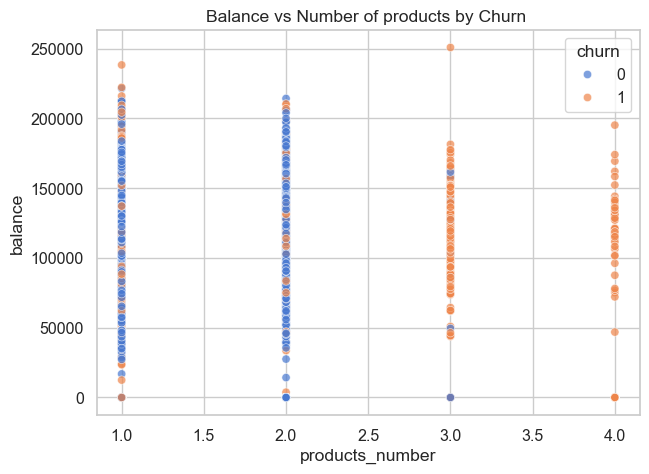

In [31]:
#Balance vs Products scatter
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='products_number', y='balance', hue='churn', alpha=0.7)
plt.title('Balance vs Number of products by Churn ')
plt.show()

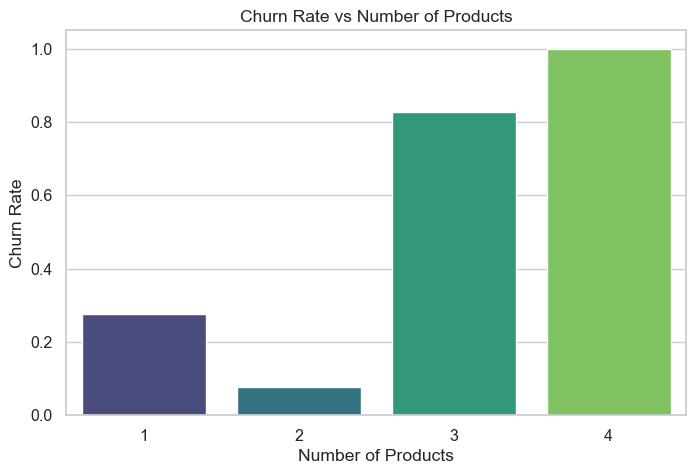

In [32]:
#Aggregate churn rate per number of products
churn_rate = df.groupby('products_number')['churn'].mean().reset_index()

# Plot churn rate
plt.figure(figsize=(8,5))
sns.barplot(data=churn_rate, x='products_number', y='churn', palette='viridis')
plt.xlabel('Number of Products')
plt.ylabel('Churn Rate')
plt.title('Churn Rate vs Number of Products')
plt.show()

Feature Engineering

In [33]:
# Feature engineering examples
df_fe = df.copy()

# Balance per product
df_fe['balance_per_product'] = df_fe['balance'] / (df_fe['products_number'].replace(0, np.nan))
df_fe['balance_per_product'].fillna(0, inplace=True)

# Salary to balance ratio
df_fe['salary_balance_ratio'] = df_fe['estimated_salary'] / (df_fe['balance'].replace(0, np.nan))
df_fe['salary_balance_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
df_fe['salary_balance_ratio'].fillna(df_fe['salary_balance_ratio'].median(), inplace=True)

# Age group
bins = [0,25,35,45,55,65,100]
labels = ['<25','25-34','35-44','45-54','55-64','65+']
df_fe['age_group'] = pd.cut(df_fe['age'], bins=bins, labels=labels)

# Tenure bucket
df_fe['tenure_bucket'] = pd.cut(df_fe['tenure'], bins=[-1,0,2,5,10,100], labels=['0','1-2','3-5','6-10','10+'])

# Flag high balance
df_fe['high_balance'] = (df_fe['balance'] > df_fe['balance'].quantile(0.75)).astype(int)

# Quick checks
df_fe[['balance_per_product','salary_balance_ratio','age','age_group','tenure','tenure_bucket','high_balance']].head()

,balance_per_product,salary_balance_ratio,age,age_group,tenure,tenure_bucket,high_balance
0,0.000000,0.839258,42,35-44,2,1-2,0
1,83807.860000,1.342864,41,35-44,1,1-2,0
2,53220.266667,0.713585,42,35-44,8,6-10,1
3,0.000000,0.839258,39,35-44,1,1-2,0
4,125510.820000,0.630098,43,35-44,2,1-2,0


Preprocessing Encoding and Scaling

In [34]:
# Define features and target
target = 'churn'
drop_cols = ['customer_id']
features = [c for c in df_fe.columns if c not in [target] + drop_cols]

numeric_features = ['credit_score','age','tenure','balance','products_number','estimated_salary',
                    'balance_per_product','salary_balance_ratio']
categorical_features = ['country','gender','credit_card','active_member','age_group','tenure_bucket','high_balance']

df_fe[categorical_features] = df_fe[categorical_features].astype('object')

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

print('Numeric features:', numeric_features)
print('Categorical features:', categorical_features)



Numeric features: ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary', 'balance_per_product', 'salary_balance_ratio']
Categorical features: ['country', 'gender', 'credit_card', 'active_member', 'age_group', 'tenure_bucket', 'high_balance']


Train Test Split

In [35]:
X = df_fe[features]
y = df_fe[target]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)
print('Train churn proportion:', y_train.mean(), 'Test churn proportion:', y_test.mean())

Train shape: (8000, 15) Test shape: (2000, 15)
Train churn proportion: 0.20375 Test churn proportion: 0.2035


MultiModel Training with pipeline and compare using cross validation

In [38]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=500),
    'RandomForest': RandomForestClassifier(n_estimators=200, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=200, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=200, random_state=42),
    'SVC': SVC(probability=True, random_state=42)
}

In [39]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = {}

for name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])
    scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1)
    results[name] = scores
    print(f"{name} AUC: Mean={scores.mean():.4f} Std={scores.std():.4f}")

LogisticRegression AUC: Mean=0.7877 Std=0.0244
RandomForest AUC: Mean=0.8486 Std=0.0130
GradientBoosting AUC: Mean=0.8628 Std=0.0097
AdaBoost AUC: Mean=0.8462 Std=0.0133
SVC AUC: Mean=0.8351 Std=0.0104


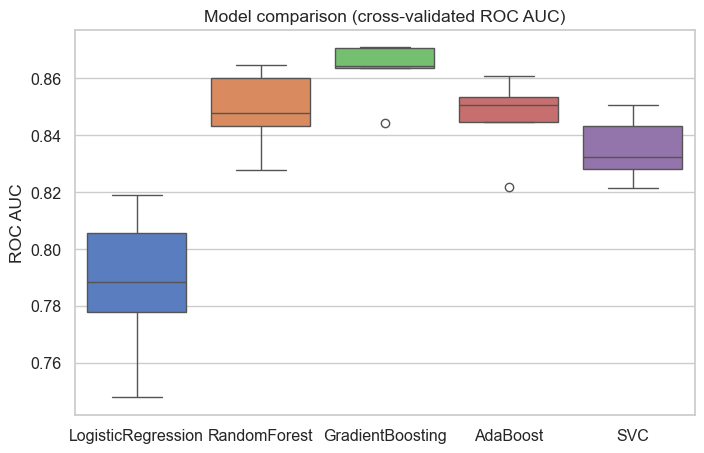

In [40]:
# Boxplot of CV AUC scores
plt.figure(figsize=(8,5))
sns.boxplot(data=[results[m] for m in list(results.keys())])
plt.xticks(ticks=range(len(results)), labels=list(results.keys()))
plt.ylabel('ROC AUC')
plt.title('Model comparison (cross-validated ROC AUC)')
plt.show()



Fit Best model on full train set and evaluate on test set

In [41]:
# Choose best model (automatic pick by mean AUC)
best_name = max(results.keys(), key=lambda k: results[k].mean())
best_name, results[best_name].mean()

('GradientBoosting', np.float64(0.8627777349731776))

In [42]:
best_model = models[best_name]
best_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', best_model)])
best_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [43]:
# Predictions
y_pred = best_pipeline.predict(X_test)
y_proba = best_pipeline.predict_proba(X_test)[:,1]

In [45]:
# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_proba)

print(f"Test Accuracy: {acc:.4f}")
print(f"Test Precision: {prec:.4f}")
print(f"Test Recall: {rec:.4f}")
print(f"Test F1-score: {f1:.4f}")
print(f"Test ROC AUC: {roc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.8680
Test Precision: 0.7804
Test Recall: 0.4889
Test F1-score: 0.6012
Test ROC AUC: 0.8692

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.78      0.49      0.60       407

    accuracy                           0.87      2000
   macro avg       0.83      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



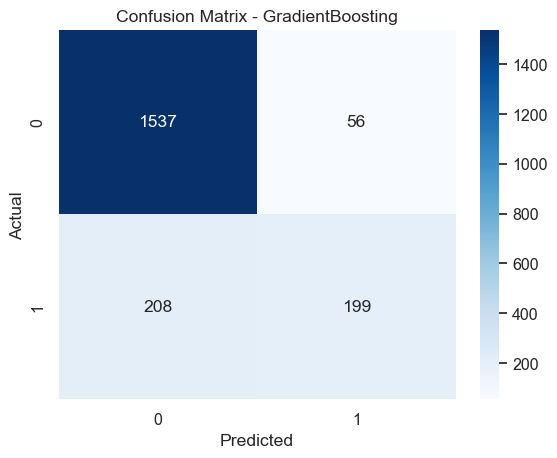

In [46]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - {best_name}')
plt.show()

Feature importance

age                     0.327665
products_number         0.266459
balance_per_product     0.063396
balance                 0.056953
active_member_0         0.052653
country_Germany         0.050689
active_member_1         0.047992
salary_balance_ratio    0.029992
estimated_salary        0.025547
credit_score            0.022685
age_group_45-54         0.020634
age_group_55-64         0.007968
gender_Female           0.006850
gender_Male             0.006532
tenure                  0.005683
country_France          0.003164
tenure_bucket_3-5       0.001564
age_group_35-44         0.001415
credit_card_1           0.000697
country_Spain           0.000577
dtype: float64

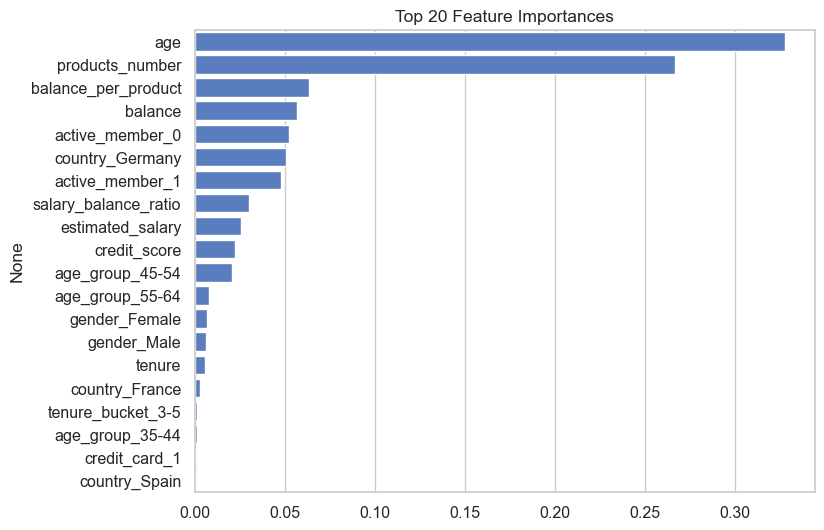

In [47]:
if hasattr(best_pipeline.named_steps['classifier'], 'feature_importances_'):
    num_feats = numeric_features
    cat_feats = list(best_pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features))
    feature_names = num_feats + cat_feats
    importances = best_pipeline.named_steps['classifier'].feature_importances_
    fi = pd.Series(importances, index=feature_names).sort_values(ascending=False)[:20]
    display(fi)
    plt.figure(figsize=(8,6))
    sns.barplot(x=fi.values, y=fi.index)
    plt.title('Top 20 Feature Importances')
    plt.show()
else:
    print('Selected model does not provide feature_importances_ attribute.')

In [ ]:
joblib.dump(best_pipeline, 'best_churn_pipeline.pkl')
print("Saved pipeline: best_churn_pipeline.pkl")

Saved pipeline: best_churn_pipeline.pkl


Predict Churn for a new customer

In [ ]:
#customer sample
# sample = {
#     'customer_id': 482917654,
#     'credit_score': 720,
#     'country': 'Germany',
#     'gender': 'Female',
#     'age': 29,
#     'tenure': 6,
#     'balance': 120000.0,
#     'products_number': 1,
#     'credit_card': 0,
#     'active_member': 0,
#     'estimated_salary': 45000.0
# }

In [ ]:
# sample_df = pd.DataFrame([sample])

# # --- Apply same feature engineering ---
# sample_df['balance_per_product'] = sample_df['balance'] / (sample_df['products_number'].replace(0, np.nan))
# sample_df['balance_per_product'].fillna(0, inplace=True)

# sample_df['salary_balance_ratio'] = sample_df['estimated_salary'] / (sample_df['balance'].replace(0, np.nan))
# sample_df['salary_balance_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
# sample_df['salary_balance_ratio'].fillna(sample_df['salary_balance_ratio'].median(), inplace=True)

# bins = [0,25,35,45,55,65,100]
# labels = ['<25','25-34','35-44','45-54','55-64','65+']
# sample_df['age_group'] = pd.cut(sample_df['age'], bins=bins, labels=labels)

# sample_df['tenure_bucket'] = pd.cut(sample_df['tenure'], bins=[-1,0,2,5,10,100], labels=['0','1-2','3-5','6-10','10+'])
# sample_df['high_balance'] = (sample_df['balance'] > 50000.0).astype(int)  # can use 75th percentile of training set


# # --- Drop ID ---
# sample_df = sample_df.drop(columns=['customer_id'])

# # --- Predict ---
# pred = best_pipeline.predict(sample_df)[0]
# prob = best_pipeline.predict_proba(sample_df)[0,1]

# print(f'Predicted churn: {pred}, probability of churn: {prob:.3f}')